##0. computer vision libraries in pytorch

* `torchvision` - vase domain library for pytorch
* `torch vision.datasets` - get dataset and data loading function for computer vision
* `torchvission.models` - get pretrained computer vision models that you can leverage for your own problems
* ` torchvision.transforms` - function for manipulating your vision data (images) to be suited for use with an ML model
* `torch.untils.data.Dataset` - base dataset class for Pytoch
* `torch.utils.data.Dataloader` - Creates a Python iterable over a dataset

In [ ]:
#import pytorch
import torch
from torch import nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)


2.3.0+cu121
0.18.0+cu121


## 1. Getting a dataset

Dataset that will be used is FashionMNIST from torchvision.datasets -

In [ ]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want tranining dataset
    download=True, #do we want to download yes/no
    transform=torchvision.transforms.ToTensor(), #how do we want to transform the data?
    target_transform=None # how do we want to transofmr the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
#chceck that shape of our image
print(f"Image shape:{image.shape} -> [color_channels,height,width]")
print(f"Image label:{class_names[label]}")

Image shape:torch.Size([1, 28, 28]) -> [color_channels,height,width]
Image label:Ankle boot


###`.2 Visualzing out data


image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

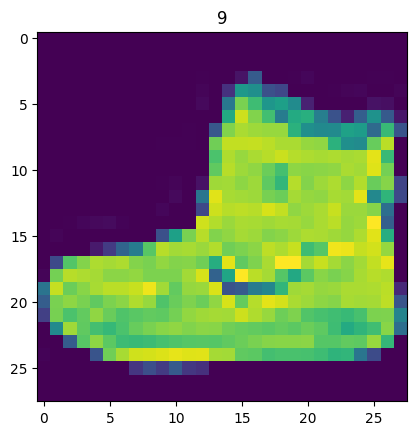

In [ ]:
import matplotlib.pyplot as plt
image,label=train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

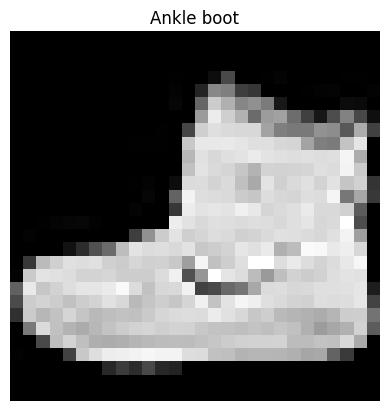

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

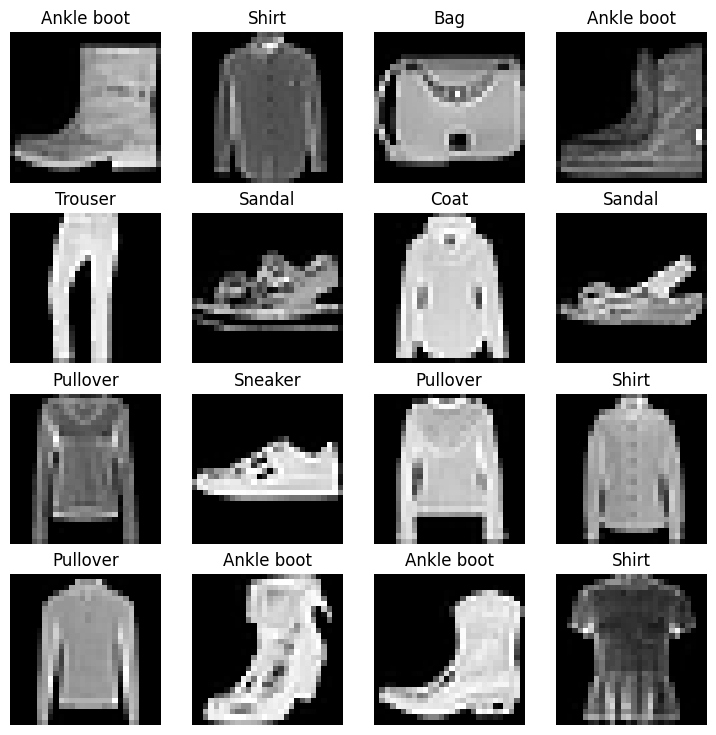

In [ ]:
#plot more images
torch.manual_seed(42)
fig=plt.figure(figsize= (9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


Items need both non linear and linear lines

##2. prepare dataloader

right now, data is in form of pytorch datasets.

Dataloader turns dataset into python iterable.

Specifically, to turn data into mini-batches

1. it is more computationally efficient, as in, computing hardware may not be able to look (store in memory) at 60k imagages in one hit, so break it down to 32 image at a time (batch size of 32)

2. gives neural network more chances to update its gradients per epoch


In [ ]:
from torch.utils.data import DataLoader

#setup batchsize hyper parameter
BATCH_SIZE = 32

#turn datasets into iteralbes (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader



(<torch.utils.data.dataloader.DataLoader at 0x7d496b0467d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7d496b045de0>)

In [ ]:
# check out what is created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7d496b0467d0>, <torch.utils.data.dataloader.DataLoader object at 0x7d496b045de0>)
Length of train dataloader: 1875 batches of 32...
Length of test dataloader: 313 batches of 32...


In [ ]:
#check out whats inside the training dataloader
train_feature_batch,train_labels_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


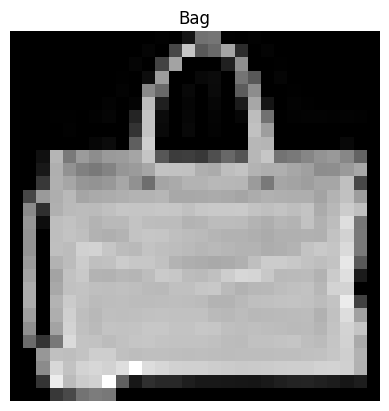

In [ ]:
#show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

##3. Model 0: Build a baseline model

* when starting to build a series of ML model experiemtents, best practice to start with a baseline model.

* A baseline model is a simple model you will try to improve upon with subsequent models/experiments

* start simple and add complexiity when necessary

In [ ]:
#create a flatten layer

flatten_model = nn.Flatten()

#get a single sample
x = train_feature_batch[0]

#flatten the sample
output = flatten_model(x) # perform forward pass

#print out what happened
print(f"shape before flattening: {x.shape} -> [color_channels,height,width]")
print(f"shape after flattening: {output.shape} -> [color_channels, height*width]")

shape before flattening: torch.Size([1, 28, 28]) -> [color_channels,height,width]
shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 28*28, # 28 by 28
    hidden_units = 10, # how many units in hidden layer
    output_shape =len(class_names) # one for every calss
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
#good way to check if the shapes come out correct
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 setup loss, optimizer and eval metrics

* loss function - multiclass data will mean `nn.CrossEntropyLoss()`
* optimizer - `torch.optim.SGD()`
* Evaluation - classification problem, lets use accruacy as eval metric

In [ ]:
#accrauacy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct/len(y_pred))*100
    return acc

In [ ]:
#download helper file for already built in ML formulas
import requests
from pathlib import Path

#download helper file
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open(Path("helper_functions.py"), "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [ ]:
# import accuracy metric
from helper_functions import accuracy_fn

#setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 creating a function to time our experiments

ML is very experimental

two main things to track is
1. Model's performance (loss and accuracy values etc)
2. how fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device = None):
  total_time = end = start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


In [ ]:
start_time = timer()
#some code
end_time = timer()
print_train_time(start = start_time, end=end_time, device = "cpu")


Train time on cpu: 1331.533 seconds


1331.532695918

## 3.3 creating a training loop and traning model on batches of data

1. loop through epocs
2. loop through training batchesm perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. print out what's happening.
5. time it all (for fun)

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 1331.554 seconds


### 4. make prediction to get model_0 results


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = None):
  """returns a dictionary containing results of model predicting a data_loader"""
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):

      #put data on target device
      X,y = X.to(device), y.to(device)

      # make predictions
      y_pred = model(X)

      #Accumulate the loss and acc vaules per batch
      loss += loss_fn(y_pred , y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))

    #scale loss and acc to find avg loss/acc per batch
    loss /=len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

#calc model_0 results on test datasets
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

##5. setup device agnostic code (for gpu if there is one)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# set up device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearlity

We learned about the power of non-linearity in notebook 02


In [ ]:
#create model with non linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features= output_shape),
        nn.ReLU()
        )
  def forward(self,x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# create instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784, #this is output of flatten after 28*28 image goes in
                               hidden_units = 10,
                               output_shape = len(class_names)).to(device) # send to GPU if available

next(model_1.parameters()).device


device(type='cuda', index=0)

###6.1 setup loss, optimizer, and eval metrics

In [ ]:
#create loss, optimizer, and eval
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() #measures how wrong model is
optimizer = torch.optim.SGD(params=model_1.parameters(), #updates model's parameters to reduce loss
                            lr = 0.1)


###6.2 Function training and evaluation/testing loops
Create functions for..

1. training loop - `train_step()`
2. testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device =device):
  """Performs a traing with model trying to learn on data_loader"""
  train_loss, train_acc = 0,0

  #put model into training mode
  model.train()

    # Add a loop to loop through training batches
  for batch, (X, y) in enumerate(data_loader):

    #put data on target device
    X,y = X.to(device), y.to(device)

    # 1. Forward pass (outputs raw logits from model)
    y_pred = model(X)

    # 2. Calculate loss and acc(per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch
    train_acc += accuracy_fn(y_true = y,
                                 y_pred = y_pred.argmax(dim=1)) #from logits -> prediction labels

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()


  # Divide total train loss and acc by length of  dataloader (average loss per batch per epoch)
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f}| Train acc: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader"""
  test_loss, test_acc = 0,0

  #put model in eval mode
  model.eval()

# turn on inference mode context manager
  with torch.inference_mode():
      for X, y in data_loader:

        #send the data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        test_pred = model(X)

        # 2. Calculate loss (accumatively)
        test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

        # 3. Calculate accuracy (preds need to be same as y_true)
        test_acc += accuracy_fn(y_true=y,
                                  y_pred=test_pred.argmax(dim=1))

      #adjust metrics and print out
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(42)

#measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

#set epochs
epochs = 3

#create optimization and eval loop using train_step and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n---------")

  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
---------
Train Loss: 1.09199| Train acc: 61.34%

Train loss: 0.45503 | Test loss: 0.95636, Test acc: 65.00%

Epoch: 1 
---------
Train Loss: 0.78101| Train acc: 71.93%

Train loss: 0.45503 | Test loss: 0.72227, Test acc: 73.91%

Epoch: 2 
---------
Train Loss: 0.67027| Train acc: 75.94%

Train loss: 0.45503 | Test loss: 0.68500, Test acc: 75.02%

Train time on cuda: 1362.115 seconds


In [ ]:
#model_1 result
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)


model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

### Model 2: building a CNN (Convolutional Neural Network)

CNN's are also known as ConvNets

CNN's are known for their capabilities to find patterns in visual data.

In [ ]:
# create cnn
class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, #theres a way to calc this
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x= self.classifier(x)
    return x


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [ ]:
rand_image_tensor = torch.randn(size = (1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

###7.1 stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

#create a batch images
images = torch.rand(size=(32,3,64,64))
test_image = images[0]

print(f"image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0

In [ ]:
#create a singe conv2d layer
conv_layer = nn.Conv2d(in_channels= 3,
                       out_channels = 1,
                       kernel_size = 3,
                       stride = 1,
                       padding = 1)

#pass data through conv. layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([1, 64, 64])

###7.2 Stepping though nn.MaxPool2d()



In [ ]:
#print original image shape without unsqueeze dim

print(f"test image originial shape: {test_image.shape}")


#create max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

#pass data through conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"test image through conv shape: {test_image_through_conv.shape}")

#pass data through max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"test image through conv and max pool shape: {test_image_through_conv_and_max_pool.shape}")

test image originial shape: torch.Size([3, 64, 64])
test image through conv shape: torch.Size([1, 64, 64])
test image through conv and max pool shape: torch.Size([1, 32, 32])


### 7.3 setup a loss function and optimizer for model_2


In [ ]:
#setup loss/function/eval/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)


### 7.4 Training and testing `model_2` using our training and test functions

In [ ]:
torch.manual_seed(42)

#measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n---------")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
---------


/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Train Loss: 0.59338| Train acc: 78.39%

Train loss: 0.45503 | Test loss: 0.38934, Test acc: 86.08%

Epoch: 1 
---------
Train Loss: 0.36047| Train acc: 87.10%

Train loss: 0.45503 | Test loss: 0.34844, Test acc: 87.32%

Epoch: 2 
---------
Train Loss: 0.32089| Train acc: 88.35%

Train loss: 0.45503 | Test loss: 0.32124, Test acc: 88.57%

Train time on cuda: 1396.370 seconds


In [ ]:
# get model_2 results
model_2_results = eval_model(model = model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3212427794933319,
 'model_acc': 88.56829073482429}

## 8. compare model results to training time

In [ ]:
import pandas as pd

compare_results = pd.DataFrame ([model_0_results,
                                 model_1_results,
                                 model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.321243,88.568291


In [ ]:
#add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                     total_train_time_model_1,
                                     total_train_time_model_2]
compare_results


,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,1331.554194
1,FashionMNISTModelV1,0.685001,75.019968,1362.114969
2,FashionMNISTModelV2,0.321243,88.568291,1396.369659


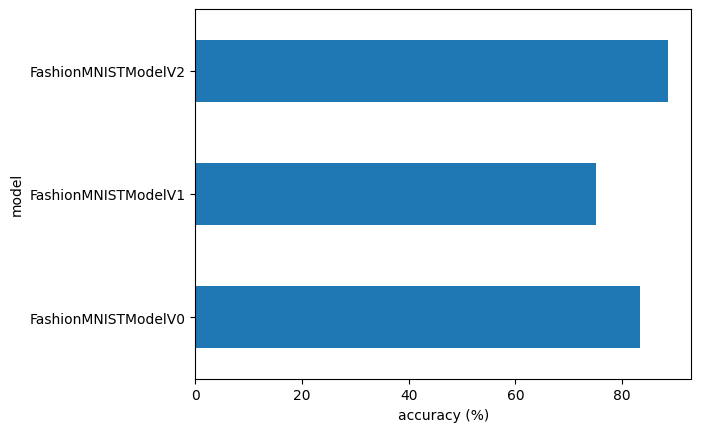

In [ ]:
#visiualize model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample
      sample = torch.unsqueeze(sample,dim=0).to(device)

      #forward pass (model outputs raw logits)
      pred_logits = model(sample)

      #get prediction probabilty (logits -> prediction probability)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      #get pred_prob off the gpu for furter calculations
      pred_probs.append(pred_prob.cpu())

  #stack pred probs to turn list into tensor
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples=[]
test_labels = []

for sample, label in random.sample(list(test_data), k=16):
  test_samples.append(sample)
  test_labels.append(label)

#view first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
#make predictions
pred_probs = make_predictions(model = model_2,
                             data= test_samples)

#view first 2 pred prob
pred_probs[:2]

tensor([[4.5502e-07, 5.3104e-07, 1.7335e-06, 5.4002e-05, 4.4471e-07, 7.4135e-03,
         4.0659e-07, 9.9047e-01, 1.3236e-04, 1.9284e-03],
        [8.8215e-02, 1.6707e-04, 2.6344e-03, 8.5761e-01, 1.8530e-03, 1.0756e-05,
         4.9357e-02, 6.6737e-07, 1.4809e-04, 2.3185e-06]])

In [ ]:
#convert prediction probabilites to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 3, 3, 6, 3, 3, 2, 1, 2, 7, 7, 2, 0, 7, 5, 7])

In [ ]:
test_labels

[7, 3, 3, 6, 3, 3, 2, 1, 2, 7, 7, 6, 0, 7, 5, 7]

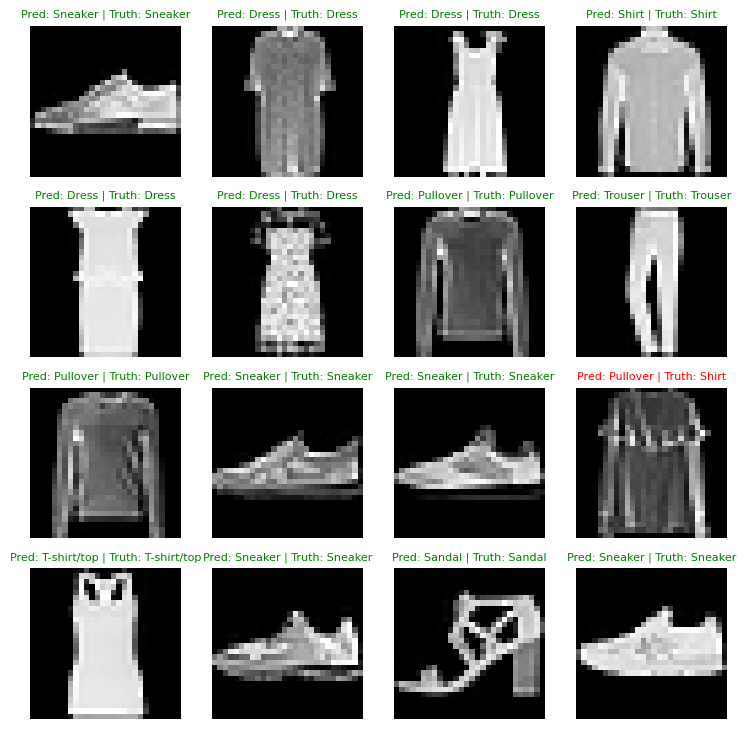

In [ ]:
#plot predictions
plt.figure(figsize=(9,9))
nrows = 4
ncols = 4
for i,sample in enumerate(test_samples):
  #create subplot
  plt.subplot(nrows,ncols,i+1)

  #plot the target image
  plt.imshow(sample.squeeze(),cmap="gray")

  #find the prediction label (in text form)
  pred_label = class_names[pred_classes[i]]

  #get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  #create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  #check for equality
  if pred_label == truth_label:
    plt.title(title_text, fontsize=8, c="green")
  else:
    plt.title(title_text, fontsize=8, c="red")

  plt.axis(False);


### 10. Confusion matrix for further prediction evaluation

Confusion matrix is a way to evaluate models visually

1. make prediction with trained model on test dataset.
2. make confusion matrix `torchmetrics.ConfusionMatrix`
3. plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix`

In [ ]:
#import tqdm.auto
from tqdm.auto import tqdm

#1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    #send data to target device
    X, y = X.to(device), y.to(device)
    #forward pass
    y_logit = model_2(X)
    #logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    #put prediction to cpu
    y_preds.append(y_pred.cpu())

  #concatenate list of predictions into a tensor
  #print(y_preds)
  y_pred_tensor = torch.cat(y_preds)
  y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
#!pip install torchmetrics -U mlxtend

In [ ]:
import torchmetrics,mlxtend

In [ ]:
mlxtend.__version__

'0.23.1'

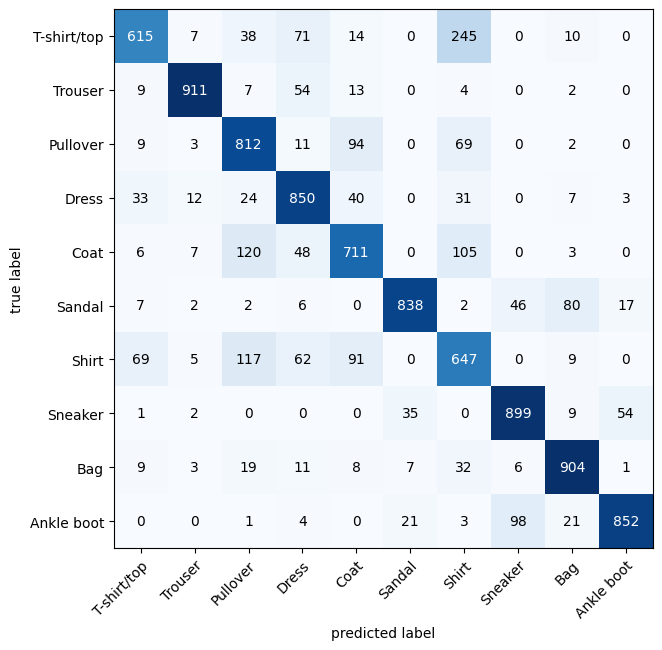

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. setup confusion instance and compare prediction to targets
confmat = ConfusionMatrix(task = 'multiclass',num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

#3.  plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                figsize=(10,7),
                                class_names=class_names)

## 11. Save and load best performing model


In [ ]:
from pathlib import Path

#create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

#create model save
MODEL_NAME = "03_PYTORCH_COMPUTER_VISION_MODEL_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to models/03_PYTORCH_COMPUTER_VISION_MODEL_2.pth


In [ ]:
#create new isntance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                     hidden_units = 10,
                                     output_shape = len(class_names))

#load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

#send model to target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model = loaded_model_2,
                                    data_loader = test_dataloader,
                                    loss_fn = loss_fn,
                                    accuracy_fn = accuracy_fn,
                                    device = device)
loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3212427794933319,
 'model_acc': 88.56829073482429}

In [ ]:
#check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-03)

tensor(True)

In [18]:
!git config --global user.email "dahan0572@gmail.com"
!git config --global user.name "DaH7"

In [19]:
!git clone https://github.com/DaH7/Machine-Learning-Concepts.git

Cloning into 'Machine-Learning-Concepts'...


In [20]:
%cd Machine-Learning-Concepts

/content/Machine-Learning-Concepts/Machine-Learning-Concepts


In [21]:
cd Machine-Learning-Concepts

[Errno 2] No such file or directory: 'Machine-Learning-Concepts'
/content/Machine-Learning-Concepts/Machine-Learning-Concepts


SyntaxError: invalid syntax (<ipython-input-23-5d6e70915484>, line 1)